# Simón Londoño Aguirre 

# Trabajo Práctico: Procesamiento de datos

En la carpeta `data` se encuentra los datos crudos de ventas durante el 2022 de las diferentes sedes de una cadeda de tiendas DuttyFree ubicadas en distintos aeropuertos del país. Esta información se encuentra en distintos archivos en formato `.parquet` los cuales deben ser reconstruidos. La compañía desea analizar los datos para apoyar su proceso de toma de decisiones. Sin embargo, estos datos son recolectados manualmente desde cada una de las sedes por lo que se requiere previamente realizar una limpieza y procesamiento de los datos.

## Carga de configuraciones:

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import os
pd.options.display.max_columns=50

df1 = pd.read_parquet('Ventas_DuttyFree_0.parquet')
df2 = pd.read_parquet('Ventas_DuttyFree_100000.parquet')
df3 = pd.read_parquet('Ventas_DuttyFree_200000.parquet')
df4 = pd.read_parquet('Ventas_DuttyFree_300000.parquet')
df5 = pd.read_parquet('Ventas_DuttyFree_400000.parquet')
df6 = pd.read_parquet('Ventas_DuttyFree_500000.parquet')
df7 = pd.read_parquet('Ventas_DuttyFree_600000.parquet')
df8 = pd.read_parquet('Ventas_DuttyFree_700000.parquet')

dfa = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], axis=0)
dfa




,id_tienda,nombre_tienda,sigla,aeropuerto,latitud,longitud,ciudad,region,id_compra,moneda,monto,tipo_viaje,tipo_transito,nacionalidad,fecha,hora,minuto,medio_pago,franquicia_tdc,porcentaje_iva,monto_iva,lleva_bolsa_plastica,lleva_alcohol,lleva_tabaco,lleva_libros,monto_pagado,monto_pagado_cop,monto_pagado_usd,monto_pagado_eur
0,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.88655,-74.77633,Barranquilla,Costa,5233170,EUR,28.26,Nacional,Arrival,Extranjera,2022-02-03,2,5,TDC,Mastercard,0.19,5.3694,1.0,1.0,NaN,NaN,EUR 28.26,NaN,NaN,28.26
1,500,DutyFree Galeras,PSO,Antonio Narino,1.39556,-77.28974,Pasto,Sur,643524,pesos colombianos,321300.00,Internacional,Arrival,Colombiana,2022-04-02,11,9,Efectivo,None,NaN,NaN,NaN,NaN,NaN,NaN,pesos colombianos 321300.0,NaN,NaN,NaN
2,600,DutyFree Capital,BOG,El Dorado,4.70103,-74.14609,Bogota,Centro,8990758,pesos colombianos,48200.00,Local,Departure,Colombiana,2022-06-26,5,57,Tarjeta,MCD,0.19,9158.0000,1.0,0.0,NaN,1.0,pesos colombianos 48200.0,NaN,NaN,NaN
3,300,DutyFree Paisa,PEI,Matecaña,4.81580,-75.73637,Pereira,Eje Cafetero,637092,dolares americanos,101.52,Local,Departure,Colombiana,2022-10-02,17,6,TDC,VISA,0.19,19.2888,1.0,1.0,NaN,0.0,dolares americanos 101.52,NaN,NaN,NaN
4,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.88655,-74.77633,Barranquilla,Costa,6853184,euros,272.79,Nacional,Departure,Extranjera,2022-03-03,3,7,TDC,AMEX,0.19,51.8301,0.0,NaN,1.0,NaN,euros 272.79,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781627,100,DutyFree Paisa,MDE,Jose Maria Cordoba,6.17160,-75.42775,Rionegro,Eje Cafetero,9683054,euros,115.17,Internacional,Salida,Extranjera,2022-08-04,8,32,Efectivo,None,NaN,NaN,1.0,NaN,1.0,1.0,euros 115.17,NaN,NaN,NaN
781628,800,DutyFree Costero,CTG,Rafael Nunez,10.44599,-75.51640,Cartagena,Costa,5190273,dolares americanos,264.71,Internacional,Salida,Colombiana,2022-07-23,15,47,Tarjeta,Mastercard,NaN,NaN,1.0,0.0,0.0,NaN,dolares americanos 264.71,NaN,NaN,NaN
781629,1000,DutyFree Costero,SMR,Simon Bolivar,11.11736,-74.23283,Santa Marta,Costa,3860589,euros,204.75,Nacional,Arrival,Colombiana,2022-02-15,21,13,Cash,None,0.19,38.9025,1.0,1.0,1.0,1.0,euros 204.75,NaN,NaN,NaN
781630,600,DutyFree Capital,BOG,El Dorado,4.70103,-74.14609,Bogota,Centro,8950782,dolares americanos,130.29,Nacional,Departure,Extranjera,2022-05-09,16,3,Tarjeta,AMEX,0.19,24.7551,NaN,0.0,1.0,NaN,dolares americanos 130.29,NaN,NaN,NaN


Lea y reconstruya los datos unificandolos en un mismo DataFrame. Luego, conteste las siguientes preguntas:

1. ¿Cuántos registros tienen los datos?
2. ¿Cuántas columnas tienen los datos?
3. De una breve explicación de los datos que contiene cada columna.
4. ¿Existe alguna columna que contenga un 'identificador único'? ¿Existen registros duplicados en este campo?
5. Haga un recuento de valores para cada columna categórica. ¿Existen valores con un mismo significado?

In [2]:
#1. ¿Cuántos registros tienen los datos?
num_registros = dfa.shape[0]
print("Número de registros:", num_registros)

#2. ¿Cuántas columnas tienen los datos?
num_columnas = dfa.shape[1]
print("Número de columnas:", num_columnas)

Número de registros: 781632
Número de columnas: 29


In [3]:
#4. ¿Existe alguna columna que contenga un 'identificador único'? ¿Existen registros duplicados en este campo?
duplicados_id_tienda = dfa['id_tienda'].duplicated().any()
duplicados_id_compra = dfa['id_compra'].duplicated().any()

print("¿Hay registros duplicados en 'id_tienda'?", duplicados_id_tienda)
print("¿Hay registros duplicados en 'id_compra'?", duplicados_id_compra)
print("Si, existen valores repetidos en el campo id_tienda")

¿Hay registros duplicados en 'id_tienda'? True
¿Hay registros duplicados en 'id_compra'? False
Si, existen valores repetidos en el campo id_tienda


In [4]:
#5. Haga un recuento de valores para cada columna categórica. ¿Existen valores con un mismo significado?
print("Si, los valores usd, dolar americano, eur, euro, cop, peso colombiano, arrival, salida, departure, llegada, local, nacional, amex, american express, mcd, mastercard,  ")

columnas_categoricas = dfa.select_dtypes(include=['object']) 
recuento_valores = {}

for i in columnas_categoricas.columns:
    recuento_valores[i] = dfa[i].value_counts()

for i, recuento in recuento_valores.items():
    print(f"\nRecuento de valores para la columna '{i}':")
    print(recuento)
    
    

Si, los valores usd, dolar americano, eur, euro, cop, peso colombiano, arrival, salida, departure, llegada, local, nacional, amex, american express, mcd, mastercard,  

Recuento de valores para la columna 'nombre_tienda':
DutyFree Costero       235270
DutyFree Paisa         155360
DutyFree Mira Ve        78393
DutyFree Capital        78336
DutyFree Galeras        78188
DutyFree Pijao          78067
DutyFree Manizalita     78018
Name: nombre_tienda, dtype: int64

Recuento de valores para la columna 'sigla':
BAQ    78789
SMR    78507
CLO    78393
BOG    78336
PSO    78188
IBE    78067
MZL    78018
CTG    77974
MDE    77949
PEI    77411
Name: sigla, dtype: int64

Recuento de valores para la columna 'aeropuerto':
Ernesto Cortissoz         78789
Simon Bolivar             78507
Alfonso Bonilla Aragon    78393
El Dorado                 78336
Antonio Narino            78188
Perales                   78067
La Nubia                  78018
Rafael Nunez              77974
Jose Maria Cordoba       

## De una breve explicación de los datos que contiene cada columna.

id_tienda: Es el identificador único de cada tienda o establecimiento donde se realizó la compra

nombre_tienda: Es el nombre de la tienda o establecimiento donde se realizó la compra

sigla: Es una abreviatura o código corto que representa la tienda o establecimiento

aeropuerto: Indica si la tienda está ubicada en un aeropuerto

latitud: Es la coordenada de latitud geográfica donde se encuentra la tienda

longitud: Es la coordenada de longitud geográfica donde se encuentra la tienda

ciudad: Es la ciudad donde se encuentra ubicada la tienda

region: Es la región geográfica o área más grande donde se encuentra la tienda

id_compra: Es el identificador único de cada compra realizada en la tienda

moneda: Indica la moneda en la que se realizó la compra

monto: Es el monto o valor de la compra realizada

tipo_viaje: Describe el tipo de viaje asociado a la compra (por ejemplo, negocios, turismo, etc.)

tipo_transito: Describe el tipo de tránsito asociado a la compra (por ejemplo, tránsito doméstico o internacional)

nacionalidad: Indica la nacionalidad del comprador

fecha: Es la fecha en que se realizó la compra

hora: Es la hora en que se realizó la compra

minuto: Es el minuto en que se realizó la compra

medio_pago: Indica el método de pago utilizado para la compra

franquicia_tdc: Indica la franquicia de la tarjeta de crédito utilizada para la compra

porcentaje_iva: Es el porcentaje del Impuesto al Valor Agregado (IVA) aplicado a la compra

monto_iva: Es el monto del Impuesto al Valor Agregado (IVA) calculado sobre la compra

lleva_bolsa_plastica: Indica si la compra incluye una bolsa plástica

lleva_alcohol: Indica si la compra incluye productos de alcohol

lleva_tabaco: Indica si la compra incluye productos de tabaco

lleva_libros: Indica si la compra incluye libros

monto_pagado: Es el monto total pagado por la compra en la moneda correspondiente

monto_pagado_cop: Es el monto total pagado por la compra en pesos colombianos

monto_pagado_usd: Es el monto total pagado por la compra en dólares estadounidenses

monto_pagado_eur: Es el monto total pagado por la compra en euros

## Manipulación de datos

Luego de reconstruir y analizar los datos, se identificaron opciones de mejorar la calidad de los datos. Realice:

1. Elimine columnas que contengan datos duplicados.
2. Para las columnas categóricas, unifique los valores con significados duplicados.

In [5]:
#1. Elimine columnas que contengan datos duplicados.

columnas_a_eliminar = ['monto_pagado', 'monto_pagado_cop', 'monto_pagado_usd', 'monto_pagado_eur']
dfa_sin_columnas = dfa.drop(columns=columnas_a_eliminar)

dfa_sin_columnas



,id_tienda,nombre_tienda,sigla,aeropuerto,latitud,longitud,ciudad,region,id_compra,moneda,monto,tipo_viaje,tipo_transito,nacionalidad,fecha,hora,minuto,medio_pago,franquicia_tdc,porcentaje_iva,monto_iva,lleva_bolsa_plastica,lleva_alcohol,lleva_tabaco,lleva_libros
0,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.88655,-74.77633,Barranquilla,Costa,5233170,EUR,28.26,Nacional,Arrival,Extranjera,2022-02-03,2,5,TDC,Mastercard,0.19,5.3694,1.0,1.0,NaN,NaN
1,500,DutyFree Galeras,PSO,Antonio Narino,1.39556,-77.28974,Pasto,Sur,643524,pesos colombianos,321300.00,Internacional,Arrival,Colombiana,2022-04-02,11,9,Efectivo,None,NaN,NaN,NaN,NaN,NaN,NaN
2,600,DutyFree Capital,BOG,El Dorado,4.70103,-74.14609,Bogota,Centro,8990758,pesos colombianos,48200.00,Local,Departure,Colombiana,2022-06-26,5,57,Tarjeta,MCD,0.19,9158.0000,1.0,0.0,NaN,1.0
3,300,DutyFree Paisa,PEI,Matecaña,4.81580,-75.73637,Pereira,Eje Cafetero,637092,dolares americanos,101.52,Local,Departure,Colombiana,2022-10-02,17,6,TDC,VISA,0.19,19.2888,1.0,1.0,NaN,0.0
4,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.88655,-74.77633,Barranquilla,Costa,6853184,euros,272.79,Nacional,Departure,Extranjera,2022-03-03,3,7,TDC,AMEX,0.19,51.8301,0.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781627,100,DutyFree Paisa,MDE,Jose Maria Cordoba,6.17160,-75.42775,Rionegro,Eje Cafetero,9683054,euros,115.17,Internacional,Salida,Extranjera,2022-08-04,8,32,Efectivo,None,NaN,NaN,1.0,NaN,1.0,1.0
781628,800,DutyFree Costero,CTG,Rafael Nunez,10.44599,-75.51640,Cartagena,Costa,5190273,dolares americanos,264.71,Internacional,Salida,Colombiana,2022-07-23,15,47,Tarjeta,Mastercard,NaN,NaN,1.0,0.0,0.0,NaN
781629,1000,DutyFree Costero,SMR,Simon Bolivar,11.11736,-74.23283,Santa Marta,Costa,3860589,euros,204.75,Nacional,Arrival,Colombiana,2022-02-15,21,13,Cash,None,0.19,38.9025,1.0,1.0,1.0,1.0
781630,600,DutyFree Capital,BOG,El Dorado,4.70103,-74.14609,Bogota,Centro,8950782,dolares americanos,130.29,Nacional,Departure,Extranjera,2022-05-09,16,3,Tarjeta,AMEX,0.19,24.7551,NaN,0.0,1.0,NaN


In [6]:
#2. Para las columnas categóricas, unifique los valores con significados duplicados.

dfa_sin_columnas['moneda'] = dfa_sin_columnas['moneda'].replace({'euros': 'EUR', 'dolares americanos': 'USD', 'pesos colombianos': 'COP'})
dfa_sin_columnas['franquicia_tdc'] = dfa_sin_columnas['franquicia_tdc'].replace('American Express', 'AMEX').replace('Mastercard', 'MCD')

dfa_sin_columnas['tipo_viaje'] = dfa_sin_columnas['tipo_viaje'].replace({'Nacional': 'Local'})
dfa_sin_columnas['tipo_transito'] = dfa_sin_columnas['tipo_transito'].replace('Arrival', 'Llegada').replace('Departure', 'Salida')

dfa_sin_columnas

,id_tienda,nombre_tienda,sigla,aeropuerto,latitud,longitud,ciudad,region,id_compra,moneda,monto,tipo_viaje,tipo_transito,nacionalidad,fecha,hora,minuto,medio_pago,franquicia_tdc,porcentaje_iva,monto_iva,lleva_bolsa_plastica,lleva_alcohol,lleva_tabaco,lleva_libros
0,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.88655,-74.77633,Barranquilla,Costa,5233170,EUR,28.26,Local,Llegada,Extranjera,2022-02-03,2,5,TDC,MCD,0.19,5.3694,1.0,1.0,NaN,NaN
1,500,DutyFree Galeras,PSO,Antonio Narino,1.39556,-77.28974,Pasto,Sur,643524,COP,321300.00,Internacional,Llegada,Colombiana,2022-04-02,11,9,Efectivo,None,NaN,NaN,NaN,NaN,NaN,NaN
2,600,DutyFree Capital,BOG,El Dorado,4.70103,-74.14609,Bogota,Centro,8990758,COP,48200.00,Local,Salida,Colombiana,2022-06-26,5,57,Tarjeta,MCD,0.19,9158.0000,1.0,0.0,NaN,1.0
3,300,DutyFree Paisa,PEI,Matecaña,4.81580,-75.73637,Pereira,Eje Cafetero,637092,USD,101.52,Local,Salida,Colombiana,2022-10-02,17,6,TDC,VISA,0.19,19.2888,1.0,1.0,NaN,0.0
4,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.88655,-74.77633,Barranquilla,Costa,6853184,EUR,272.79,Local,Salida,Extranjera,2022-03-03,3,7,TDC,AMEX,0.19,51.8301,0.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781627,100,DutyFree Paisa,MDE,Jose Maria Cordoba,6.17160,-75.42775,Rionegro,Eje Cafetero,9683054,EUR,115.17,Internacional,Salida,Extranjera,2022-08-04,8,32,Efectivo,None,NaN,NaN,1.0,NaN,1.0,1.0
781628,800,DutyFree Costero,CTG,Rafael Nunez,10.44599,-75.51640,Cartagena,Costa,5190273,USD,264.71,Internacional,Salida,Colombiana,2022-07-23,15,47,Tarjeta,MCD,NaN,NaN,1.0,0.0,0.0,NaN
781629,1000,DutyFree Costero,SMR,Simon Bolivar,11.11736,-74.23283,Santa Marta,Costa,3860589,EUR,204.75,Local,Llegada,Colombiana,2022-02-15,21,13,Cash,None,0.19,38.9025,1.0,1.0,1.0,1.0
781630,600,DutyFree Capital,BOG,El Dorado,4.70103,-74.14609,Bogota,Centro,8950782,USD,130.29,Local,Salida,Extranjera,2022-05-09,16,3,Tarjeta,AMEX,0.19,24.7551,NaN,0.0,1.0,NaN


## Agrupación de datos

Luego de haber hecho una limpieza de datos, conteste las siguientes preguntas:

1. ¿Cuánto fue el total de ventas de cada tienda?
2. ¿Cuánto fue el total de ventas en pesos colombianos de cada tienda? Utilice el valor actual de la divisa para la conversión.
3. ¿Cuánto fue el total de ventas de cada zona?
4. ¿Cuánto fue el total de ventas en pesos colombianos de cada zona? Utilice el valor actual de la divisa para la conversión.
5. ¿Qué porcentaje de compras llevaron bolsas?
6. ¿Cuanto pagó por concepto de IVA cada tienda durante el año?
7. ¿Cúal fue el día con mayor cantidad de transacciones?
8. ¿De las compras realizadas con tarjetas de crédito, cuál fue la franquicia con mayor monto de ventas por divisa?
9. ¿Cuál fue el mes con menos cantidad de transacciones?
10. ¿Por cada tienda, qué día de la semana es el de menor cantidad de ventas?

In [7]:
#1. ¿Cuánto fue el total de ventas de cada tienda?

total_ventas_por_tienda_moneda = dfa_sin_columnas.groupby(['moneda','nombre_tienda']).size()

print("Total de ventas por tienda y moneda:\n")
print(total_ventas_por_tienda_moneda)

Total de ventas por tienda y moneda:

moneda  nombre_tienda      
COP     DutyFree Capital       26221
        DutyFree Costero       78298
        DutyFree Galeras       26138
        DutyFree Manizalita    26132
        DutyFree Mira Ve       26256
        DutyFree Paisa         51307
        DutyFree Pijao         25778
EUR     DutyFree Capital       26096
        DutyFree Costero       78197
        DutyFree Galeras       25958
        DutyFree Manizalita    25955
        DutyFree Mira Ve       26271
        DutyFree Paisa         52017
        DutyFree Pijao         26145
USD     DutyFree Capital       26019
        DutyFree Costero       78775
        DutyFree Galeras       26092
        DutyFree Manizalita    25931
        DutyFree Mira Ve       25866
        DutyFree Paisa         52036
        DutyFree Pijao         26144
dtype: int64


In [8]:
#2.¿Cuánto fue el total de ventas en pesos colombianos de cada tienda? Utilice el valor actual de la divisa para la conversión.

valor_dolar = 3988
valor_euro = 4383

def convertir_cop(column):
    if column['moneda'] == 'COP':
        return column['monto']
    elif column['moneda'] == 'USD':
        return column['monto'] * valor_dolar
    elif column['moneda'] == 'EUR':
        return column['monto'] * valor_euro

dfa_sin_columnas['ventas_cop'] = dfa_sin_columnas.apply(convertir_cop, axis=1)
total_ventas = dfa_sin_columnas.groupby(['nombre_tienda'])['ventas_cop'].sum()

print(f" El total de ventas en pesos colombianos de las tiendas fue de: \n {total_ventas}")


 El total de ventas en pesos colombianos de las tiendas fue de: 
 nombre_tienda
DutyFree Capital       4.055948e+10
DutyFree Costero       1.217149e+11
DutyFree Galeras       4.045689e+10
DutyFree Manizalita    4.037321e+10
DutyFree Mira Ve       4.059822e+10
DutyFree Paisa         8.063752e+10
DutyFree Pijao         4.038205e+10
Name: ventas_cop, dtype: float64


In [24]:
#3.
import pandas as pd
total_ventas_por_zona = dfa.groupby('region').size()
print(total_ventas_por_zona)


region
Centro          156403
Costa           235270
Eje Cafetero    233378
Sur             156581
dtype: int64


In [10]:
#4.
import pandas as pd

valor_dolar_cop = 4100
valor_euro_dolar = 1.10

def convertir_a_cop(row):
    if row['moneda'] == 'COP':
        return row['monto']
    elif row['moneda'] == 'USD':
        return row['monto'] * valor_dolar_cop
    elif row['moneda'] == 'EUR':
        return row['monto'] * valor_euro_dolar * valor_dolar_cop
    else:
        return row['monto'] * valor_dolar_cop


dfa_sin_columnas['total_ventas_cop'] = dfa_sin_columnas.apply(convertir_a_cop, axis=1)
total_ventas_cop_por_zona = dfa_sin_columnas.groupby('region')['total_ventas_cop'].sum()

print(total_ventas_cop_por_zona)


region
Centro          8.287373e+10
Costa           1.246209e+11
Eje Cafetero    1.239023e+11
Sur             8.298800e+10
Name: total_ventas_cop, dtype: float64


In [11]:
#5.
import pandas as pd

compras_con_bolsas = dfa[dfa['lleva_bolsa_plastica'] == 1]
porcentaje_compras_con_bolsas = (len(compras_con_bolsas) / len(dfa)) * 100
print(f"Porcentaje de compras con bolsas: {porcentaje_compras_con_bolsas:.2f}%")


Porcentaje de compras con bolsas: 49.92%


In [12]:
#6.
import pandas as pd
iva_año_tienda = dfa_sin_columnas.groupby(['nombre_tienda', 'moneda'])['monto_iva'].sum()
print(iva_año_tienda)


nombre_tienda        moneda
DutyFree Capital     COP       8.475633e+08
                     EUR       5.177763e+05
                     USD       5.079319e+05
DutyFree Costero     COP       2.528259e+09
                     EUR       1.534119e+06
                     USD       1.547174e+06
DutyFree Galeras     COP       8.464289e+08
                     EUR       5.123697e+05
                     USD       5.155425e+05
DutyFree Manizalita  COP       8.422579e+08
                     EUR       5.091716e+05
                     USD       5.140953e+05
DutyFree Mira Ve     COP       8.516487e+08
                     EUR       5.152632e+05
                     USD       5.103840e+05
DutyFree Paisa       COP       1.658863e+09
                     EUR       1.016207e+06
                     USD       1.023931e+06
DutyFree Pijao       COP       8.264448e+08
                     EUR       5.086984e+05
                     USD       5.154296e+05
Name: monto_iva, dtype: float64


In [13]:
#7.
import pandas as pd

dfa['fecha'] = pd.to_datetime(dfa['fecha'])
transacciones_por_dia = dfa.groupby(dfa['fecha'].dt.date).size()
dia_mayor_transacciones = transacciones_por_dia.idxmax()

print(f"Día con mayor cantidad de transacciones: {dia_mayor_transacciones}")


Día con mayor cantidad de transacciones: 2022-05-27


In [14]:
#8.
resultado = dfa[dfa['medio_pago']=='Tarjeta'].groupby(['moneda', 'franquicia_tdc'])['monto'].sum().groupby('moneda').idxmax()
print("Pesos colombianos: " + resultado["COP"][1])
print("Euros: " + resultado["EUR"][1])
print("Dólares americanos: " + resultado["USD"][1])


Pesos colombianos: AMEX
Euros: American Express
Dólares americanos: Mastercard


In [15]:
#9.

dfa['fecha'] = pd.to_datetime(dfa['fecha'])
transacciones_por_mes = dfa.groupby([dfa['fecha'].dt.year, dfa['fecha'].dt.month]).size()
mes_menor_transacciones = transacciones_por_mes.idxmin()

print(f"Mes con menor cantidad de transacciones: {mes_menor_transacciones}")


Mes con menor cantidad de transacciones: (2022, 2)


In [16]:
#10
import pandas as pd
dfa['fecha'] = pd.to_datetime(dfa['fecha'])

def obtener_dia_semana_texto(fecha):
    dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
    return dias_semana[fecha.weekday()]

dfa['dia_semana_texto'] = dfa['fecha'].apply(obtener_dia_semana_texto)
ventas_por_tienda_dia_semana = dfa.groupby(['nombre_tienda', 'dia_semana_texto']).size()
dia_menor_ventas_por_tienda = ventas_por_tienda_dia_semana.groupby('nombre_tienda').idxmin()
dia_menor_ventas_por_tienda = dia_menor_ventas_por_tienda.apply(lambda x: x[1])

print(dia_menor_ventas_por_tienda)


nombre_tienda
DutyFree Capital          Martes
DutyFree Costero           Lunes
DutyFree Galeras         Viernes
DutyFree Manizalita       Jueves
DutyFree Mira Ve       Miércoles
DutyFree Paisa            Martes
DutyFree Pijao            Jueves
dtype: object


# Gráficas de datos

Realice los siguientes gráficos:

1. Un histograma de frecuencias de la cantidad de ventas por día.
2. Un gráfico lineal con el monto de ventas diarias. Utilice un eje cada divisa según su magnitud.
3. Un gráfico de barras del total del monto de ventas (en Pesos Colombianos) por cada tienda durante el año.
4. Un gráfico circular del monto total de ventas (en Pesos Colombianos) por zonas
5. Un gráfico de dispersión del monto de ventas (en Pesos Colombianos) vs El día del mes (1 al 31). Utilice distintos marcadores y colores para indicar el tipo de tránsito y la nacionalidad del comprador.

`TIP`: utilice [matplotlib](https://matplotlib.org/cheatsheets/) para realizar los gráficos.



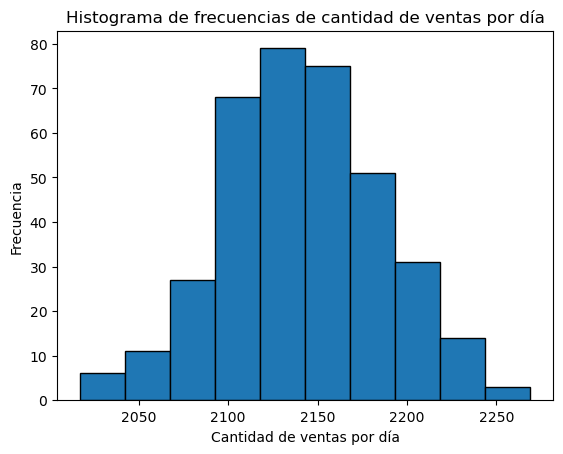

In [17]:
#1. Un histograma de frecuencias de la cantidad de ventas por día.
ventas_por_dia = dfa_sin_columnas.groupby('fecha')['monto'].count()
plt.hist(ventas_por_dia, bins=10, edgecolor='black')
plt.xlabel('Cantidad de ventas por día')
plt.ylabel('Frecuencia')
plt.title('Histograma de frecuencias de cantidad de ventas por día')
plt.show()

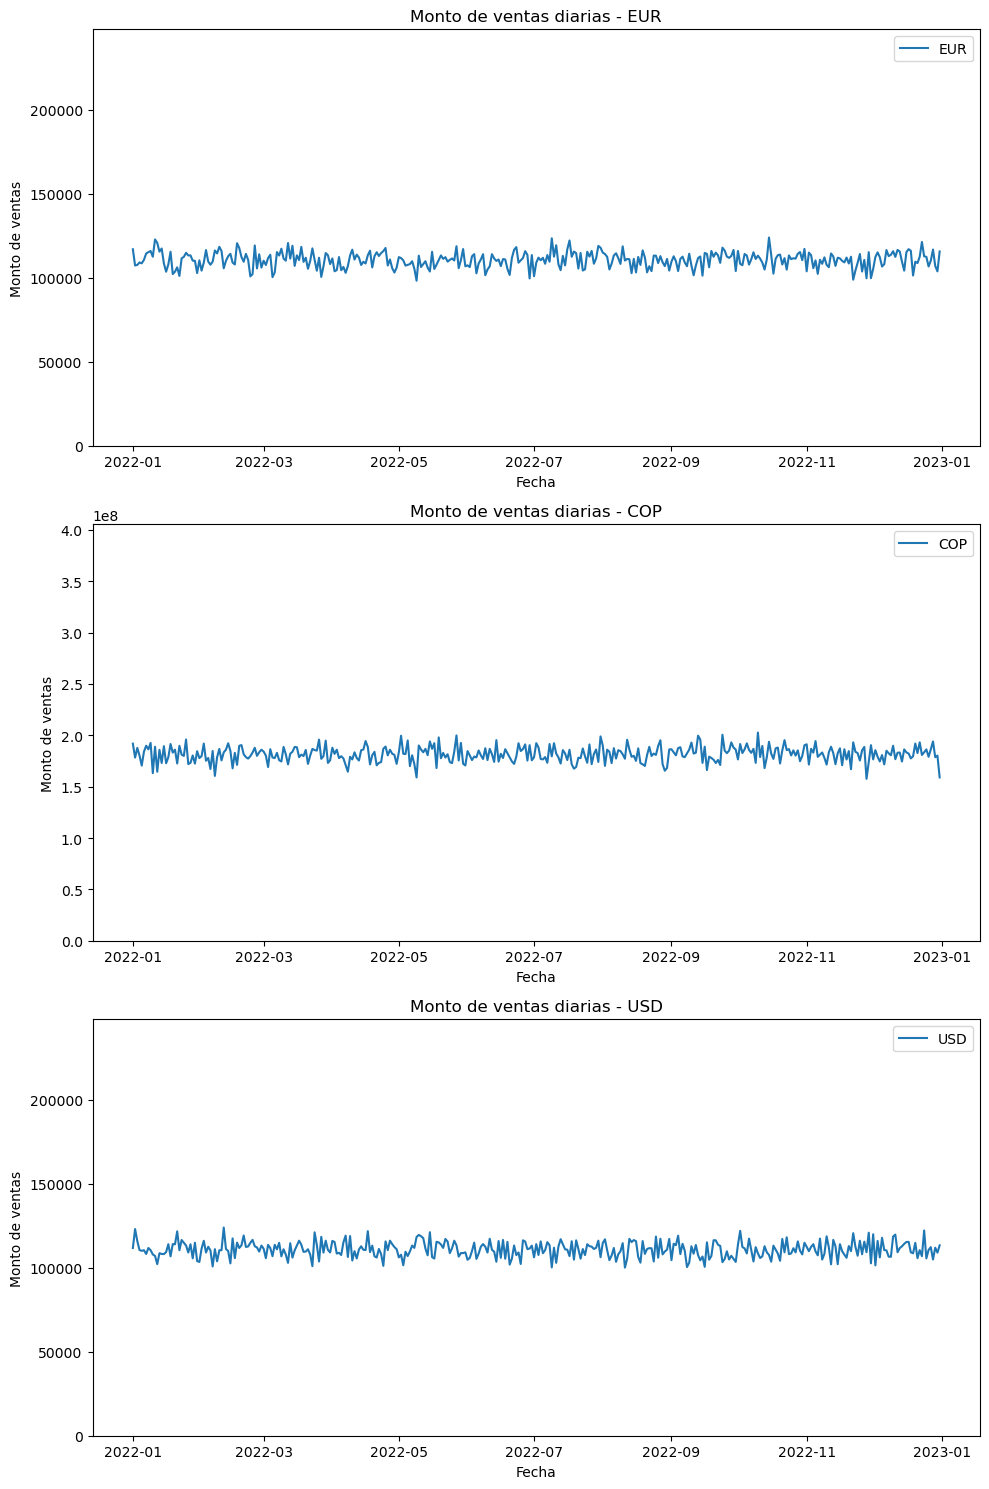

In [18]:
#2. Un gráfico lineal con el monto de ventas diarias. Utilice un eje cada divisa según su magnitud.
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
divisas = dfa_sin_columnas['moneda'].unique()

for i, divisa in enumerate(divisas):
    ventas_por_dia_divisa = dfa_sin_columnas[dfa_sin_columnas['moneda'] == divisa].groupby('fecha')['monto'].sum()
    ax = axes[i]
    ax.plot(ventas_por_dia_divisa.index, ventas_por_dia_divisa.values, label=divisa)
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Monto de ventas')
    ax.set_title(f'Monto de ventas diarias - {divisa}')
    ax.legend()
    ax.set_ylim(0, ventas_por_dia_divisa.max() * 2)  # Ajustar el rango del eje y

plt.tight_layout()  # Ajustar el diseño de las subtramas
plt.show()


<Figure size 1000x600 with 0 Axes>

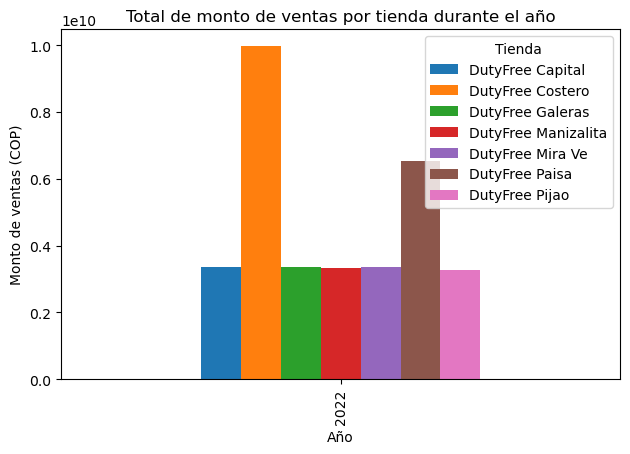

In [19]:
#3.Un gráfico de barras del total del monto de ventas (en Pesos Colombianos) por cada tienda durante el año.
import matplotlib.pyplot as plt

ventas_por_año_tienda = dfa.groupby([dfa['fecha'].dt.year, 'nombre_tienda'])['monto_pagado_cop'].sum()
plt.figure(figsize=(10, 6))
ventas_por_año_tienda.unstack().plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Monto de ventas (COP)')
plt.title('Total de monto de ventas por tienda durante el año')
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()


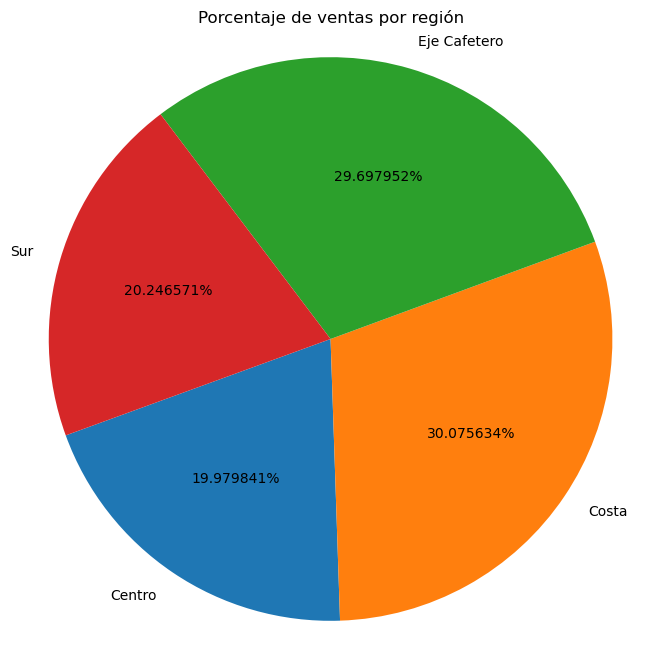

In [20]:
# 4. Un gráfico circular del monto total de ventas (en Pesos Colombianos) por zonas

ventas_por_region = dfa.groupby('region')['monto_pagado_cop'].sum()
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.pie(ventas_por_region, labels=ventas_por_region.index, autopct='%1f%%', startangle=200)
plt.title('Porcentaje de ventas por región')
plt.axis('equal')
plt.show()


C:\Users\londo\AppData\Local\Temp\ipykernel_11128\3218257523.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab20')


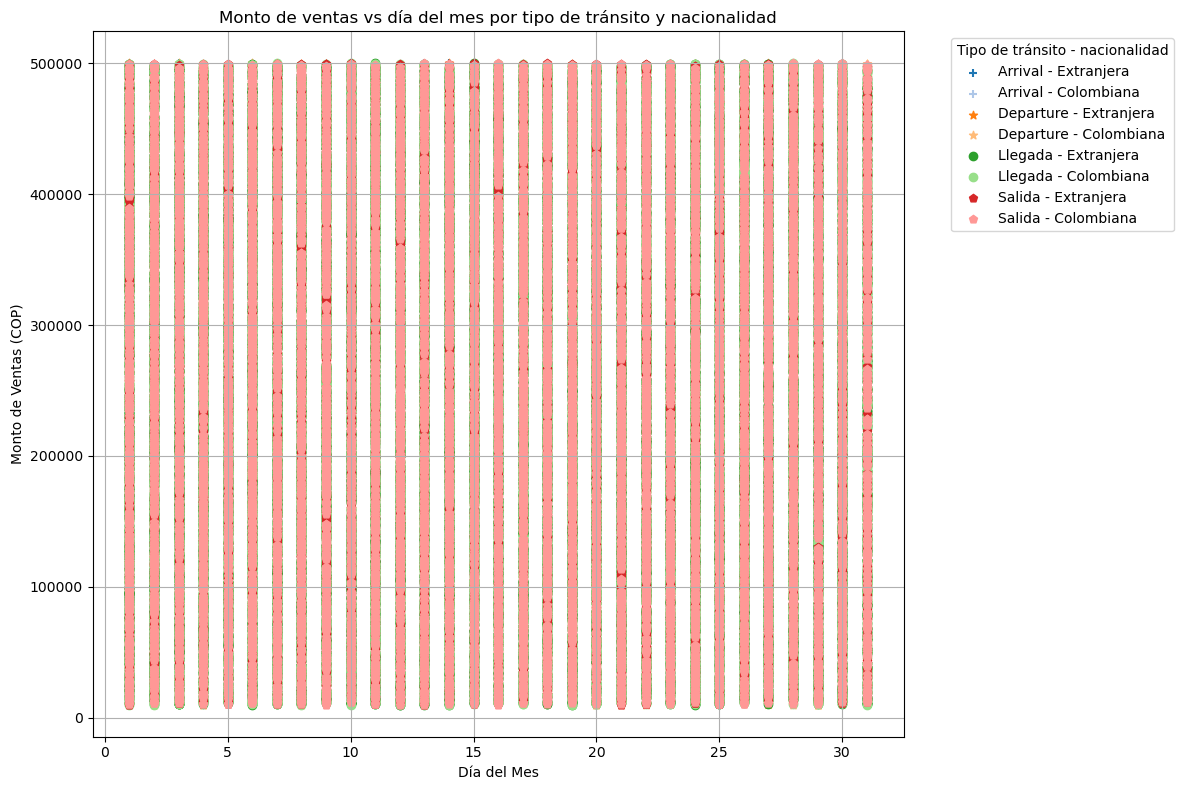

In [21]:
import matplotlib.pyplot as plt

tipos_transito = dfa['tipo_transito'].unique()
nacionalidades = dfa['nacionalidad'].unique()
colormap = plt.cm.get_cmap('tab20')
colores = [colormap(i) for i in range(len(tipos_transito) * len(nacionalidades))]
marcadores = ['+', '*', 'o', 'p', '~', 'x', '_', '-']

plt.figure(figsize=(12, 8))

for i, tipo_transito in enumerate(tipos_transito):
    for j, nacionalidad in enumerate(nacionalidades):
        filtro = (dfa['tipo_transito'] == tipo_transito) & (dfa['nacionalidad'] == nacionalidad)
        ventas_filtradas = dfa[filtro]
        if not ventas_filtradas.empty:
            plt.scatter(ventas_filtradas['fecha'].dt.day, ventas_filtradas['monto_pagado_cop'], label=f'{tipo_transito} - {nacionalidad}', color=colores[i * len(nacionalidades) + j], marker=marcadores[i])

plt.xlabel('Día del Mes')
plt.ylabel('Monto de Ventas (COP)')
plt.title('Monto de ventas vs día del mes por tipo de tránsito y nacionalidad')
plt.legend(title='Tipo de tránsito - nacionalidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()




## Visualizaciones adicionales: Mapas

Los datos poseen latitud y longitud de cada una de las sedes de la compañía. Realice un Mapa interactivo donde coloque un marcador en cada una de las sedes y que adicional muestre:

- Nombre de la tienda.
- ID de la tienda.
- Aeropuerto y ciudad.
- Sigla del aeropuerto.
- Región.
- Cantidad de ventas realizadas.
- Suma total de las ventas (En COP).

`TIP`: Puede utilizar (Folium)[https://python-visualization.github.io/folium/quickstart.html] para realizar el mapa.

In [31]:


import folium
import pandas as pd

def crear_popup(row):
    ventas = '{:,.2f}'.format(cantidad[row["id_tienda"]])
    suma_cop = '{:,.2f}'.format(row["monto_pagado_cop"])
    
    popup_content = f'''
        <style>
            table.popup-table {{
                width: 100%;
                border-collapse: collapse;
                border: 1px solid black;
                color: black;
            }}
            th.popup-th, td.popup-td {{
                padding: 8px;
                text-align: left;
                border-bottom: 1px solid black;
                border-top: 1px solid black;
            }}
            th.popup-th {{
                background-color: #f2f2f2;
            }}
            tr.popup-tr:hover {{
                background-color: #f5f5f5;
            }}
        </style>
        <table class="popup-table">
            <tr class="popup-tr">
                <th class="popup-th">Nombre</th>
                <td class="popup-td">{row["nombre_tienda"]}</td>
            </tr>
            <tr class="popup-tr">
                <th class="popup-th">ID</th>
                <td class="popup-td">{str(row['id_tienda'])}</td>
            </tr>
            <tr class="popup-tr">
                <th class="popup-th">Aeropuerto</th>
                <td class="popup-td">{row["aeropuerto"]}</td>
            </tr>
            <tr class="popup-tr">
                <th class="popup-th">Ciudad</th>
                <td class="popup-td">{row["ciudad"]}</td>
            </tr>
            <tr class="popup-tr">
                <th class="popup-th">Sigla</th>
                <td class="popup-td">{row["sigla"]}</td>
            </tr>
            <tr class="popup-tr">
                <th class="popup-th">Región</th>
                <td class="popup-td">{row["region"]}</td>
            </tr>
           
            <tr class="popup-tr">
                <th class="popup-th">Total COP </th>
                <td class="popup-td">${suma_cop}</td>
            </tr>
        </table>
    '''
    return popup_content

tiendas = dfa.groupby('id_tienda').agg({
    'latitud': 'mean',
    'longitud': 'mean',
    'nombre_tienda': 'first',
    'aeropuerto': 'first',
    'ciudad': 'first',
    'sigla': 'first',
    'region': 'first',
    'monto_pagado_cop': 'sum',
}).reset_index()

cantidad = dfa.groupby('id_tienda')['monto_pagado_cop'].count()

mapa = folium.Map(location=[4.60972, -78.08180], zoom_start=5)

for _, row in tiendas.iterrows():
    popup_content = crear_popup(row)
    folium.Marker(
        [float(row["latitud"]), float(row["longitud"])],
        popup=popup_content,
        tooltip=row['nombre_tienda']
    ).add_to(mapa)

mapa
